# Ford GoBike System
## by Omar Ehab

## Investigation Overview

> In this investigation, I wanted to look at the customer behaviour characteristics of the bay Area bike share system. The main focus was on the time (weekday, hour), when bikes were high in demand.

## Dataset Overview

> This document explores the Ford GoBike's trip data for public containing approximately 152446 bike rides from AUG2020. The attributes included the trip start/end time, as well as additional measurements such as user type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('202008-baywheels-tripdata.csv')

In [6]:
data_clean = data.copy()
data_clean.started_at = pd.to_datetime(data_clean.started_at)
data_clean.ended_at = pd.to_datetime(data_clean.ended_at)
# extract start time month name
data_clean['start_time_month_name']=data_clean['started_at'].dt.strftime('%B')
# extract start time month number
data_clean['start_time_month']=data_clean['started_at'].dt.month.astype(int)
# extract start time weekdays
data_clean['start_time_weekday']=data_clean['started_at'].dt.strftime('%a')
# extract start time day
data_clean['start_time_day']=data_clean['started_at'].dt.day.astype(int)
# extract start time hour
data_clean['start_time_hour']=data_clean['started_at'].dt.hour
# extract start time minute
data_clean['start_time_minute']=data_clean['started_at'].dt.minute
data_clean['duration'] = data_clean['ended_at'] - data_clean['started_at']
data_clean['Duration_minuts'] = data_clean['ended_at'].dt.minute - data_clean['started_at'].dt.minute


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Individual trips by subscription type¶


> Ford GoBike System has to types of customers the one who have membership who called (member) and the one who using the bike share system ocasionally (casual)

In [4]:
customer = data.query('member_casual == "casual"')['ride_id'].count()
subscriber = data.query('member_casual == "member"')['ride_id'].count()

customer_proportion = customer / data['ride_id'].count()
subscriber_proportion = subscriber / data['ride_id'].count()
customer_proportion

0.5939677000380462

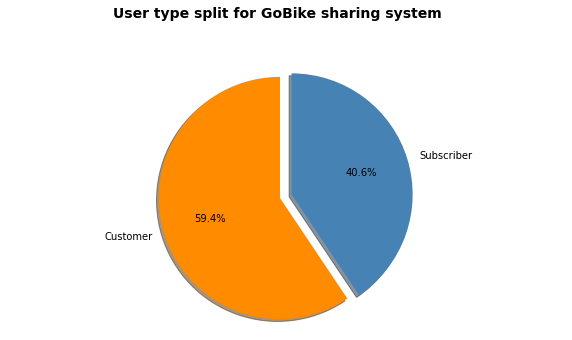

In [5]:
plt.figure(figsize = [10, 5])
labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

## Daily and weekly habits by subscription type¶


> Based on the below heatmap, we can clearly indicate different renting habits for customers and subscribers and based on the renting purpose we can assign them to two different groups: leisure for customers and commute for subscribers.

#### Customers use the bike sharing system more often on weekends:
* weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm. The system for this type is also more often used around the lunchtime than for subscribers.
* weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm
#### Subscribers use the bike sharing system mainly on weekdays:
* weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
* weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout entire weekends
In

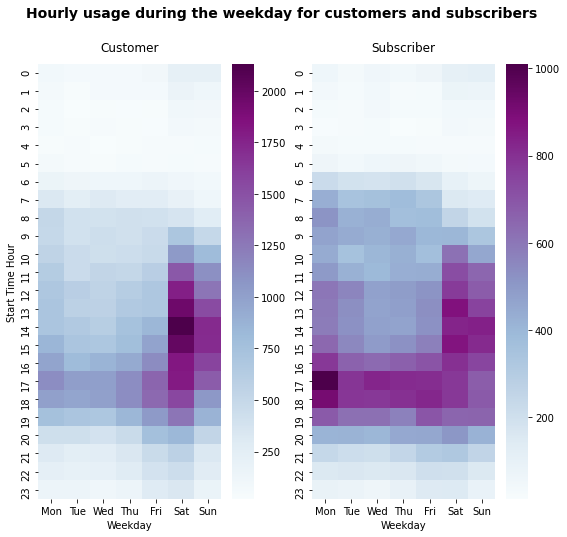

In [7]:

data_clean['start_time_weekday'] = pd.Categorical(data_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = data_clean.query('member_casual == "casual"').groupby(["start_time_hour", "start_time_weekday"])["ride_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "ride_id")
sb.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = data_clean.query('member_casual == "member"').groupby(["start_time_hour", "start_time_weekday"])["ride_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "ride_id")
sb.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

## Lenght of trips by subscription type¶


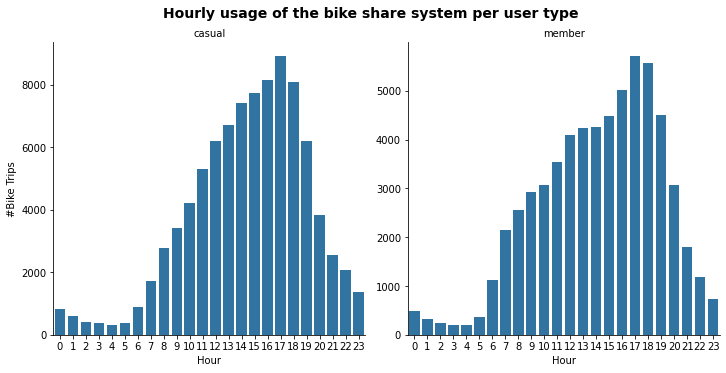

In [9]:
base_color = sb.color_palette()[0]
g = sb.catplot(data=data_clean, x='start_time_hour', col="member_casual", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Hour", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

### Summary

Renting a bike from Ford GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in urban areas, both for pleasure and work. There are two types of clients using the system: subscribers who are mainly daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around the lunch time, and customers, usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!